# EDA Visualizations

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/processed/cars_clean.csv')

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)

df.describe()

,car_id,price,car_age,engine_volume,cylinders,car_run_km,safety_feature_count,comfort_feature_count,abs,esd,...,chair_warming,climat_control,customs_passed,tech_inspection,has_turbo,right_wheel,start_stop,back_camera,is_dealer,is_spec
count,2.779300e+04,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,...,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000
mean,7.391947e+07,8741.910049,15.551758,2229.920232,4.590544,138172.534019,2.270284,17.683805,0.925845,0.824812,...,0.577484,0.783471,0.642536,0.825064,0.155219,0.137840,0.043644,0.519627,0.268629,0.000864
std,2.359122e+06,9398.900229,6.699567,838.814098,1.219244,96308.927888,0.890396,7.520963,0.262028,0.380135,...,0.493969,0.411887,0.479262,0.379919,0.362120,0.344739,0.204306,0.499624,0.443254,0.029374
min,2.494033e+07,1100.000000,3.000000,500.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.413162e+07,3400.000000,11.000000,1600.000000,4.000000,65000.000000,2.000000,14.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.450006e+07,5600.000000,14.000000,2000.000000,4.000000,140360.000000,3.000000,18.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.479193e+07,9588.000000,20.000000,2500.000000,5.000000,200000.000000,3.000000,22.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,7.498887e+07,55000.000000,82.000000,7700.000000,12.000000,680000.000000,3.000000,39.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Barplots

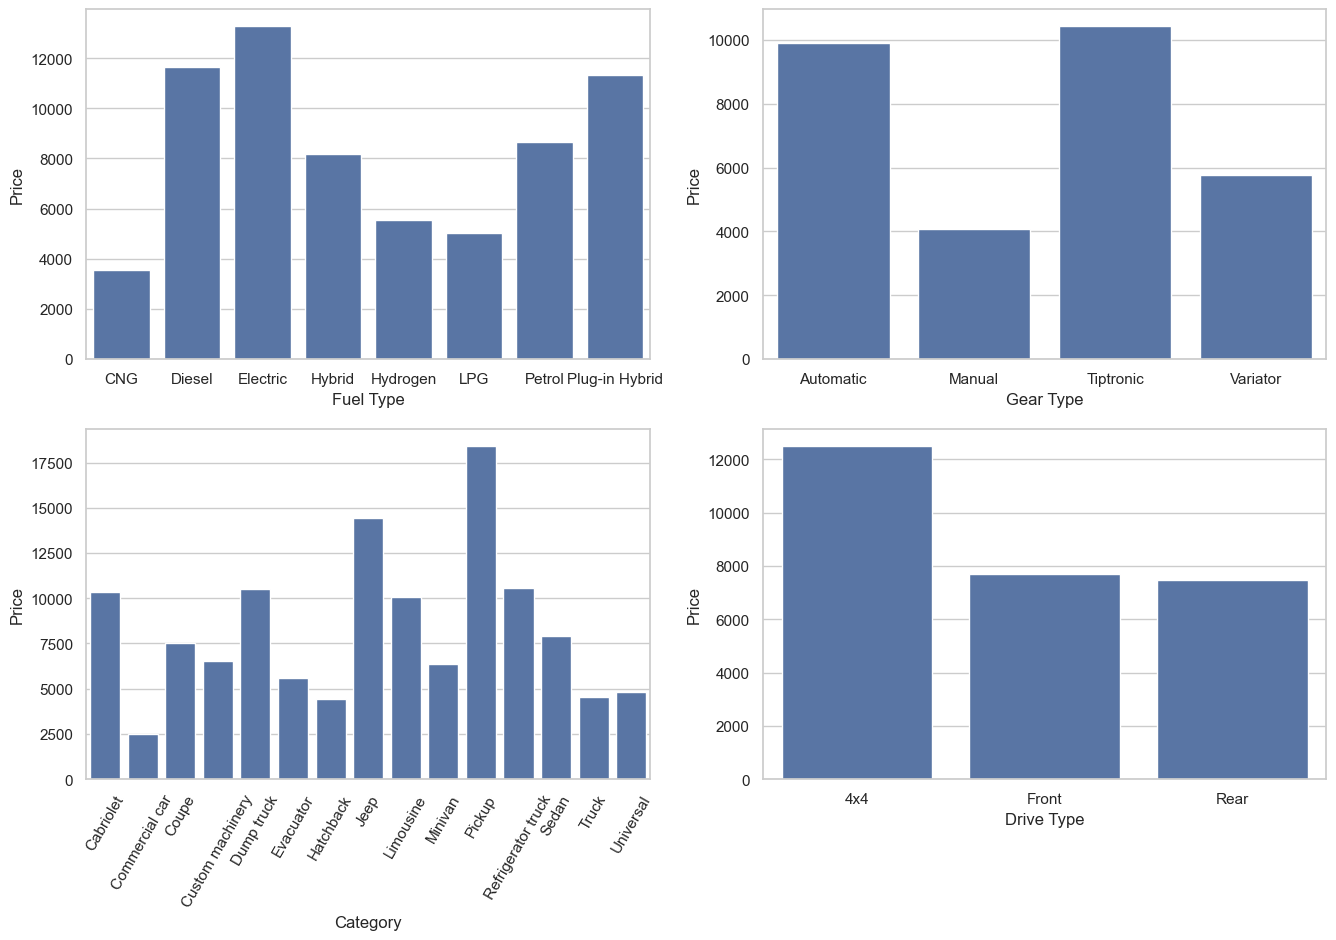

In [57]:
plt.subplot(2, 2, 1)

grouped_by_fuel_type = df.groupby('fuel_type')['price'].mean().reset_index()

sns.barplot(data=grouped_by_fuel_type, x='fuel_type', y='price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

plt.subplot(2, 2, 2)

grouped_by_gear_type = df.groupby('gear_type')['price'].mean().reset_index()

sns.barplot(data=grouped_by_gear_type, x='gear_type', y='price')
plt.xlabel('Gear Type')
plt.ylabel('Price')

plt.subplot(2, 2, 3)

grouped_by_category = df.groupby('category')['price'].mean().reset_index()

sns.barplot(data=grouped_by_category, x='category', y='price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=60)

plt.subplot(2, 2, 4)

grouped_by_drive_type = df.groupby('drive_type')['price'].mean().reset_index()

sns.barplot(data=grouped_by_drive_type, x='drive_type', y='price')
plt.xlabel('Drive Type')
plt.ylabel('Price')
plt.show()

## Correlations

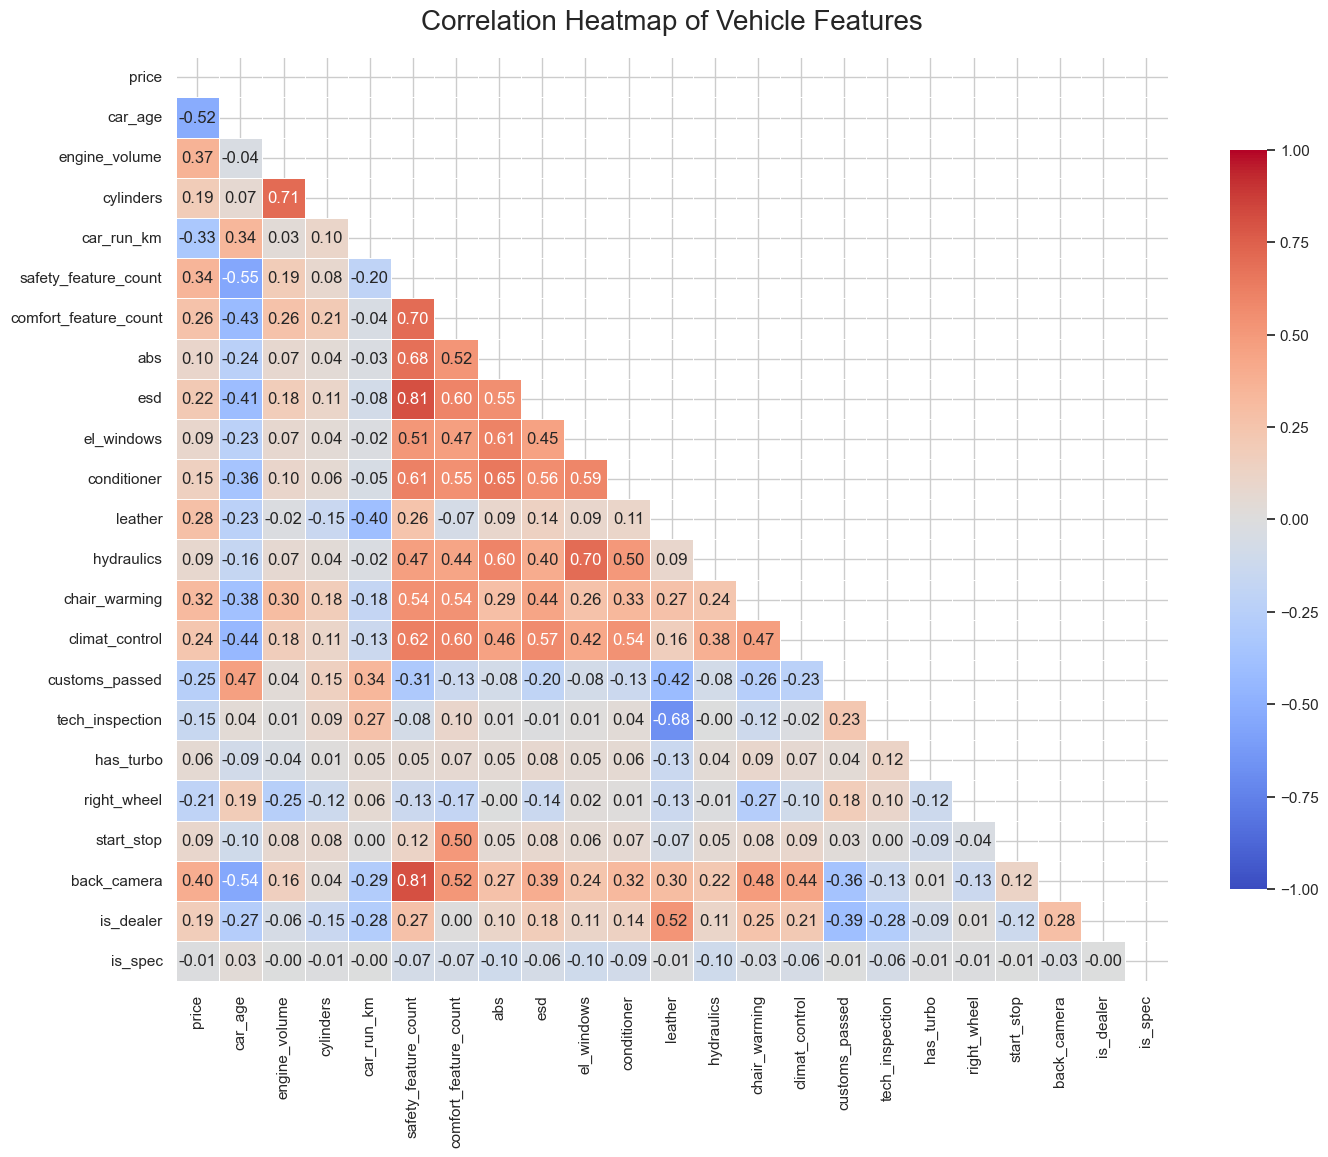

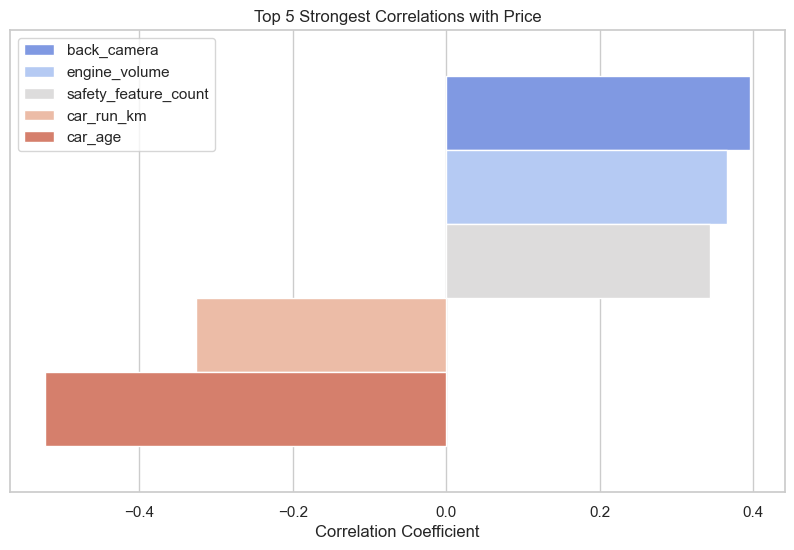

In [58]:
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['car_id'], errors='ignore')
corr_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))

heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",            # Round to 2 decimal places
    cmap='coolwarm',      # Red for positive, Blue for negative correlation
    vmin=-1, vmax=1,      # Ensure the scale is always -1 to 1
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Heatmap of Vehicle Features', fontsize=20, pad=20)
plt.show()

correlations = corr_matrix['price']
correlations = correlations.drop(['price'])

top_5_features = correlations.abs().sort_values(ascending=False).head(5)
top_5_summary = correlations[top_5_features.index].sort_values(ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x=top_5_summary.values, hue=top_5_summary.index, palette='coolwarm')
plt.title('Top 5 Strongest Correlations with Price')
plt.xlabel('Correlation Coefficient')
plt.legend()
plt.show()

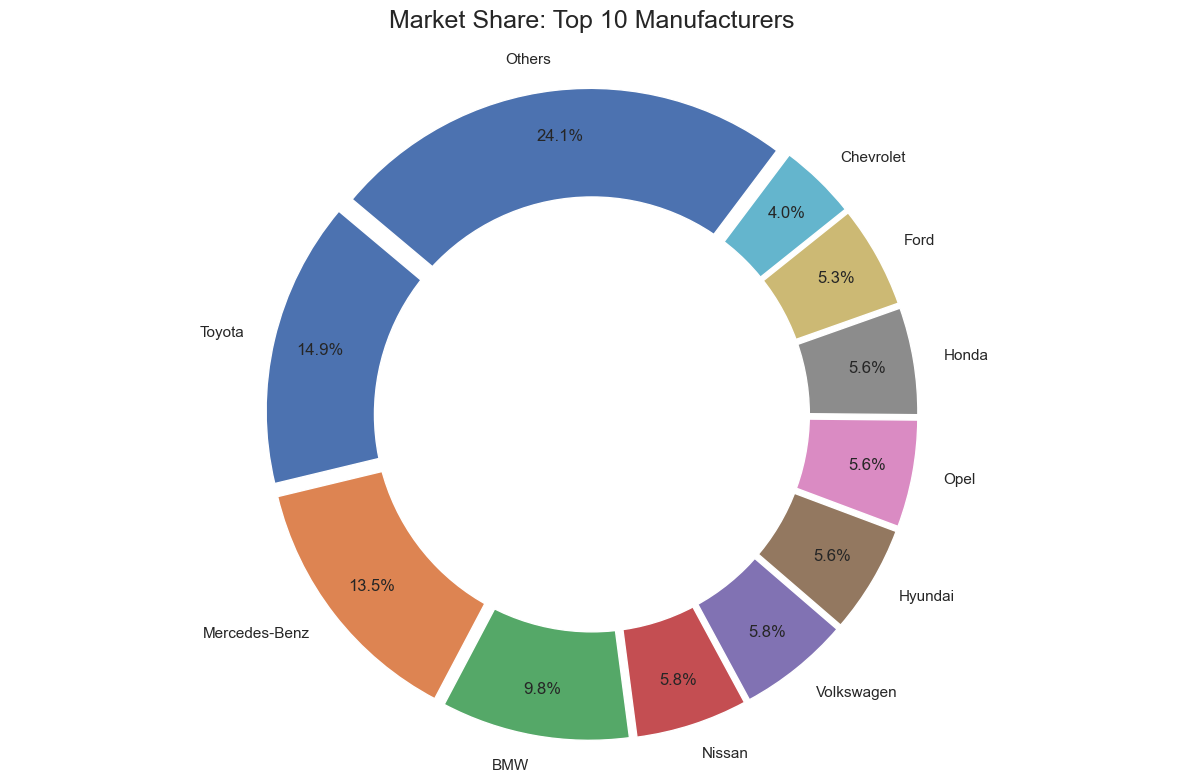

In [59]:
man_counts = df['manufacturer'].value_counts()

# How many top manufacturers to show
top_n = 10
top_man = man_counts.head(top_n)

# Group the rest into 'Others'
others_count = man_counts.iloc[top_n:].sum()
if others_count > 0:
    top_man = pd.concat([top_man, pd.Series({'Others': others_count})])

# Pie/Donut Chart
plt.figure(figsize=(12, 8))

plt.pie(
    top_man,
    labels=top_man.index,
    autopct='%1.1f%%',      # Show percentages
    startangle=140,
    pctdistance=0.85,       # Move percentages further out
    explode=[0.05] * len(top_man) # Slight separation between slices
)

# Turn it into a Donut Chart (add white circle in the center)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title(f'Market Share: Top {top_n} Manufacturers', fontsize=18, pad=20)
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

## Boxplots

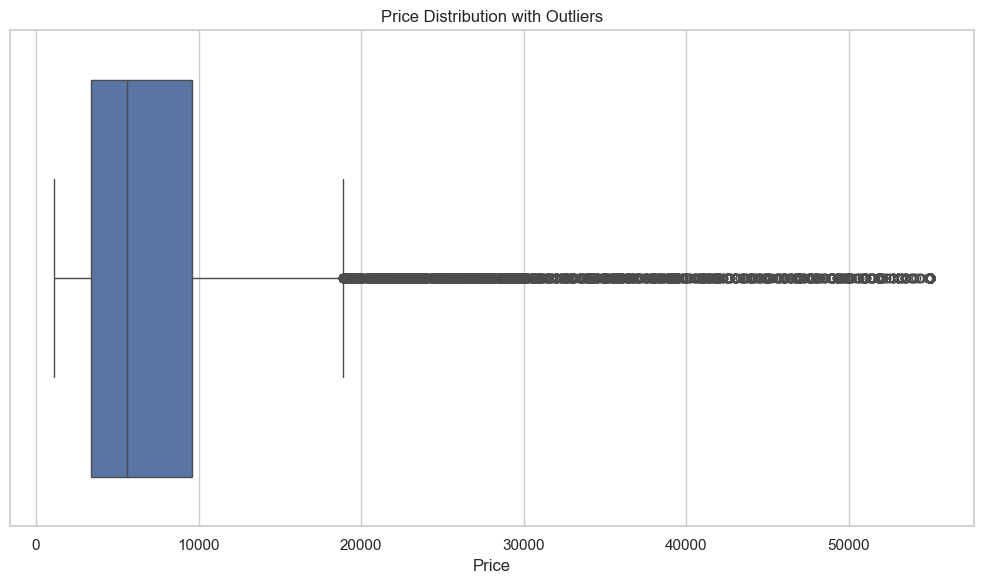

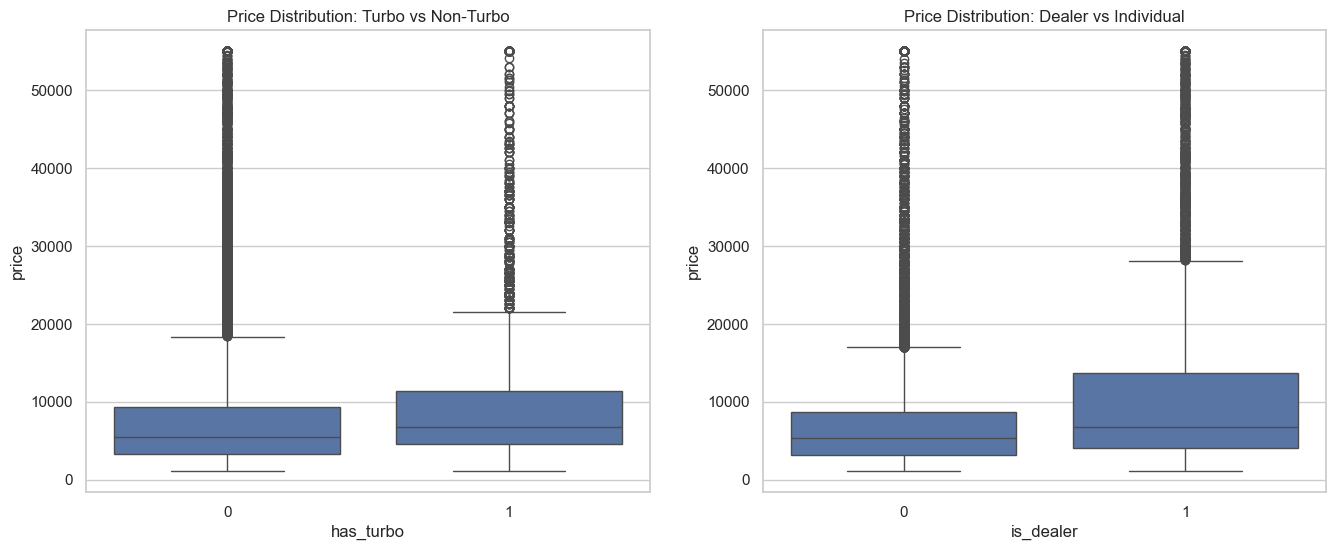

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=df['price'],
    showfliers=True
)

plt.title('Price Distribution with Outliers')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='has_turbo', y='price')
plt.title('Price Distribution: Turbo vs Non-Turbo')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='is_dealer', y='price')
plt.title('Price Distribution: Dealer vs Individual')
plt.show()

## distributions

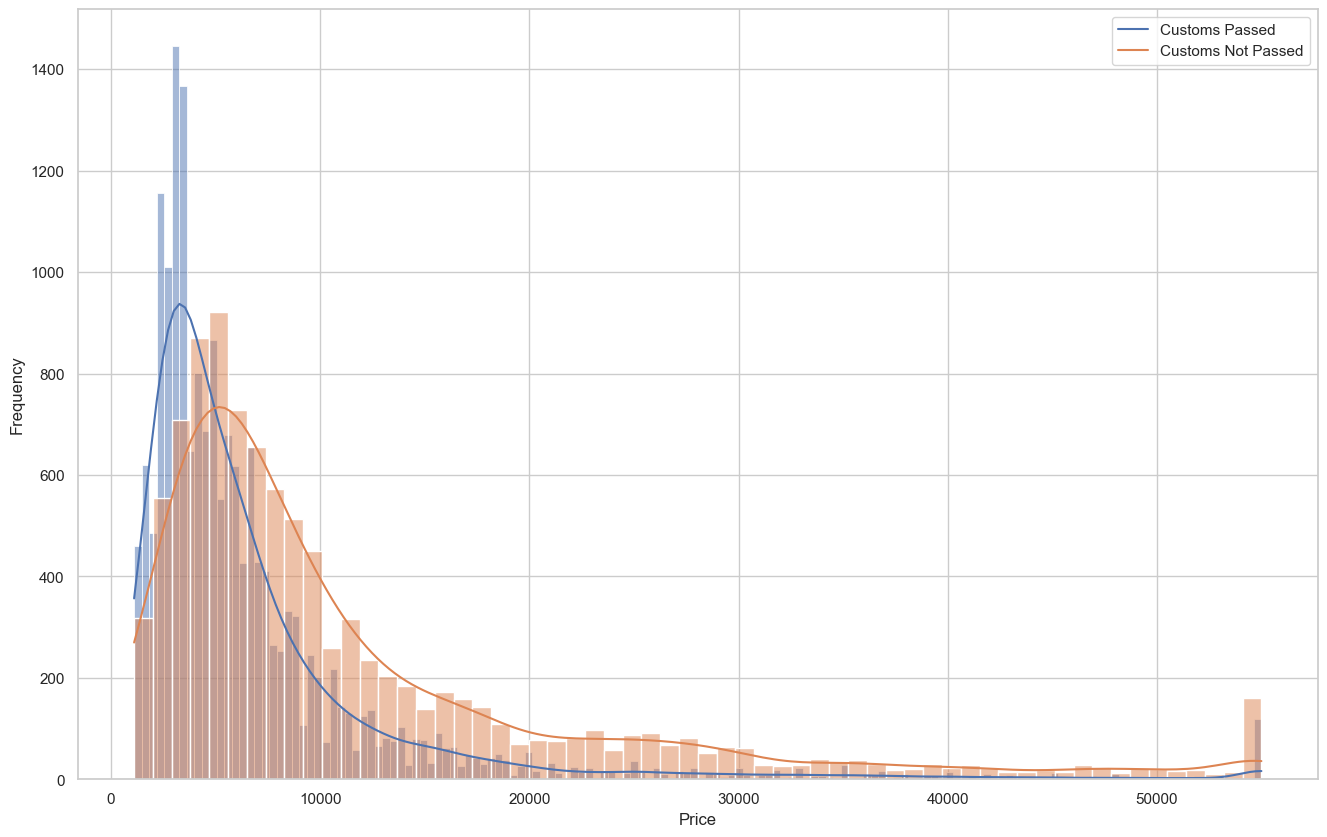

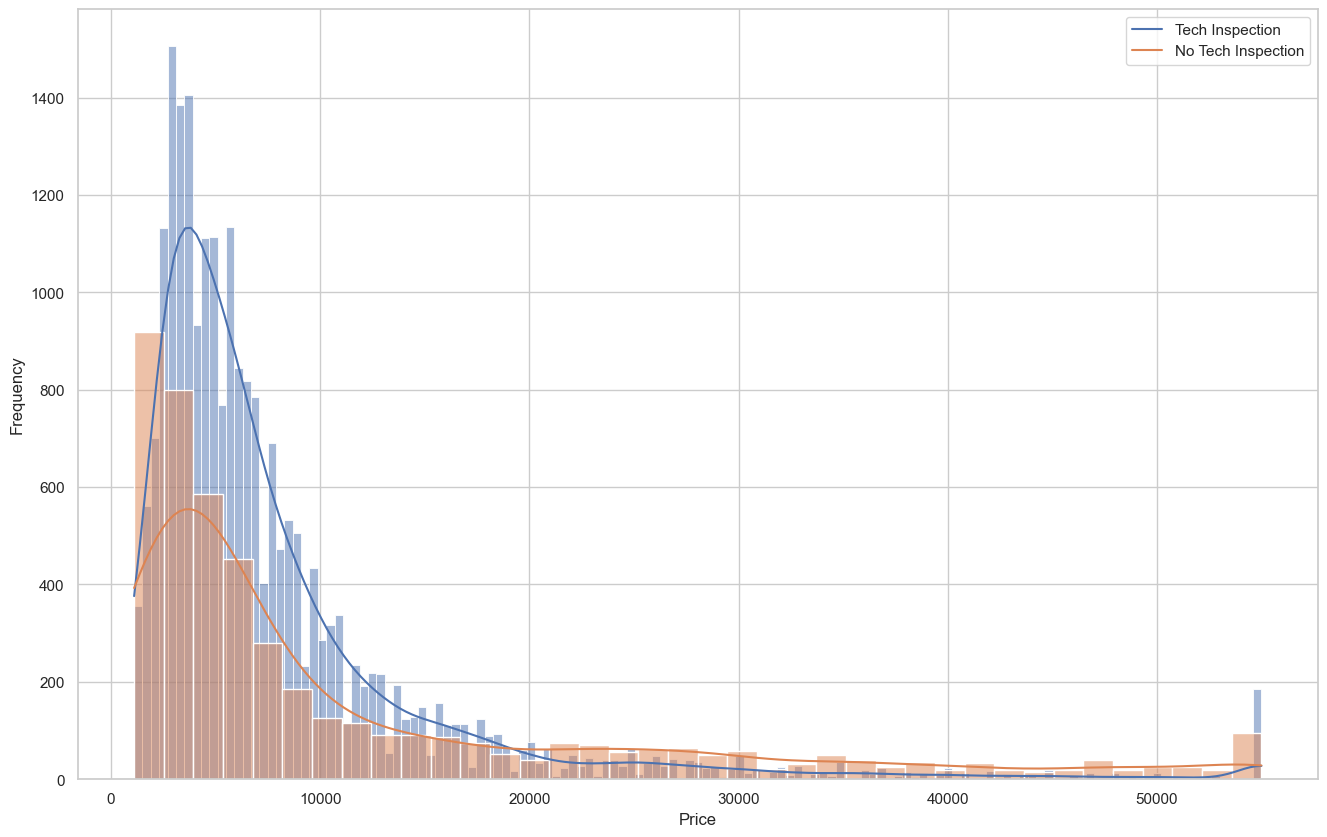

/var/folders/yk/_pxs4k190zv7qyl1d8qf38x00000gn/T/ipykernel_38371/14400114.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_category = df[df['category'].isin(['Jeep', 'Sedan', 'Hatchback'])].groupby('category').apply(lambda x: sns.histplot(x['price'], kde=True, color=colors.pop(0)))


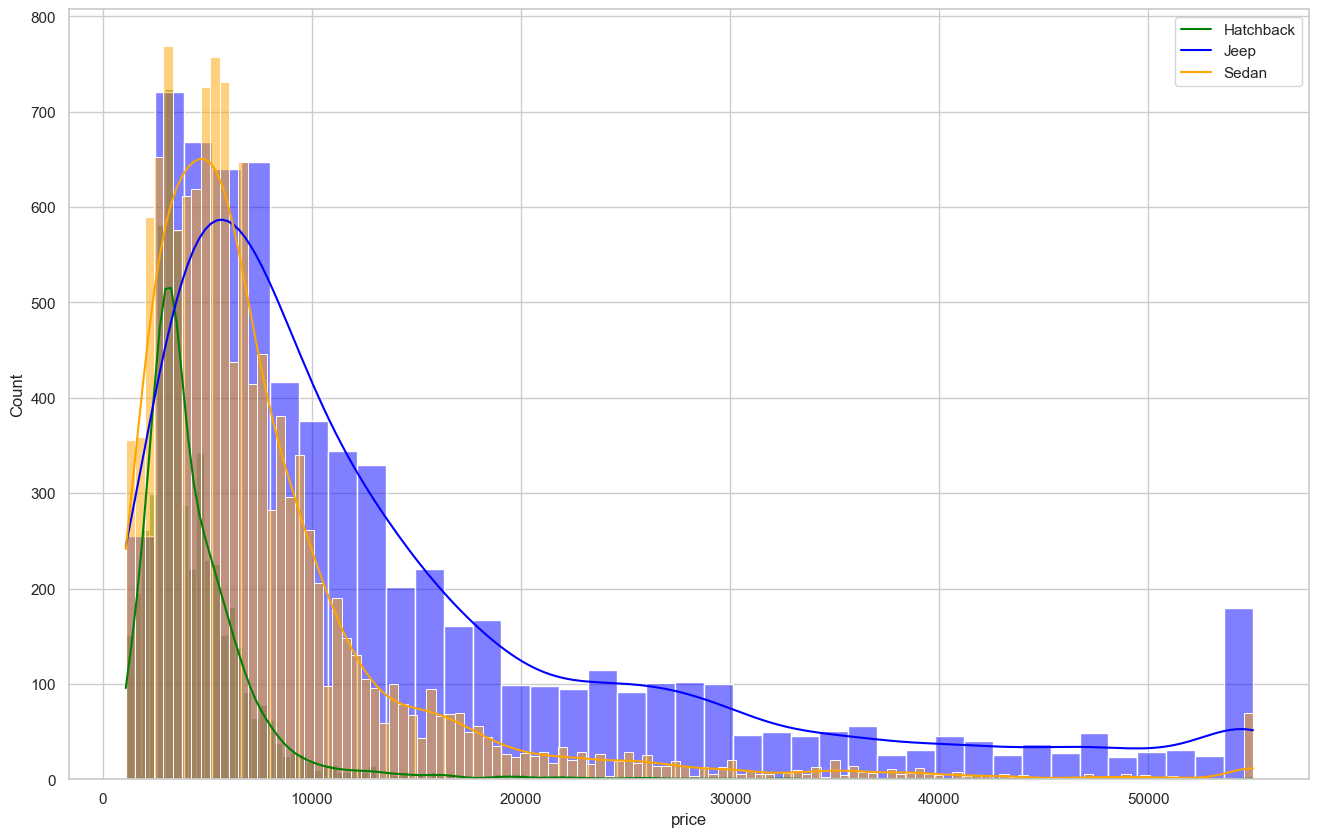

In [61]:
# hist plots

# customs passed
df_customs = df[df['customs_passed'] == True]
df_no_customs = df[df['customs_passed'] == False]

sns.histplot(data=df_customs, x='price', kde=True)
sns.histplot(data=df_no_customs, x='price', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(['Customs Passed', 'Customs Not Passed'])
plt.show()

# tech inspection
df_tech_inspection = df[df['tech_inspection'] == True]
df_no_tech_inspection = df[df['tech_inspection'] == False]

sns.histplot(data=df_tech_inspection, x='price', kde=True)
sns.histplot(data=df_no_tech_inspection, x='price', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(['Tech Inspection', 'No Tech Inspection'])
plt.show()

# histplot of price distribution per category only jeep, sedans, hatchbacks
colors = ['green', 'blue', 'orange']
by_category = df[df['category'].isin(['Jeep', 'Sedan', 'Hatchback'])].groupby('category').apply(lambda x: sns.histplot(x['price'], kde=True, color=colors.pop(0)))
plt.legend(by_category.index)
plt.show()

## scater plots

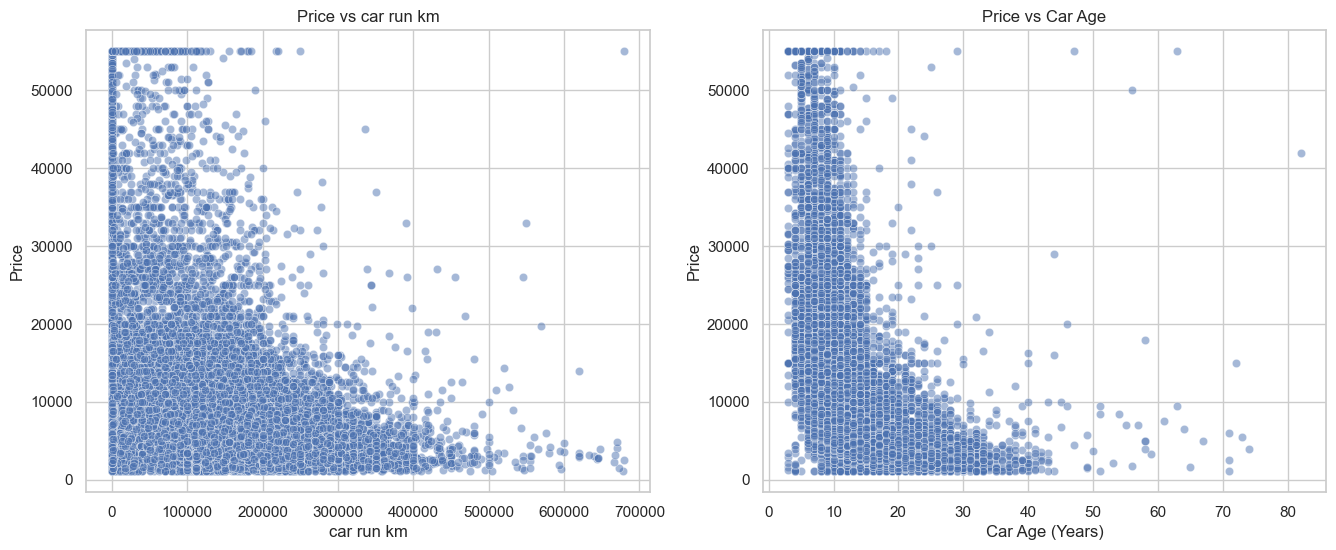

In [63]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='car_run_km', y='price', alpha=0.5)
plt.title('Price vs car run km')
plt.xlabel('car run km')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='car_age', y='price', alpha=0.5)
plt.title('Price vs Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price')
plt.show()